Load the python packages

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Mount Drive content for the data to be loaded

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Load the Data frame

In [5]:
df=pd.read_csv('/content/drive/MyDrive/SergheiLabProjects/Sepsis_Tejas/GeneExpressionAnalysis_Python /CellCompositionData/GSE95233/GSE95233_Factors_GeneAnnotated_HPCAOrthogonalV1.0.csv_50_Entropy_0.0_Predictions.csv')
df

,Cell Type,age,gender,survival,MSC,Bronchial_Epithelial_cells,Fibroblasts,Endothelial_cells,Adipocytes,Keratinocytes,...,Dendritic_cells_(BDCA1+),Dendritic_cells_(BDCA3+),Dendritic_cells_(plasmacytoid+),T_cells_(CD4+),T_cells_(CD8+),T_cells_(gamma-delta),NK_cells,Neutrophils,Neutrophils_LPS,B_cells
0,GSM2500349_CS500.CEL.gz,52,F,NA-Control,0,0.000000,0,0.001653,0.0,0.0,...,0.027174,0.000000,0.025390,0.170519,0.046805,0.066383,0.038377,0.262079,0.090077,0.083722
1,GSM2500350_CS526.CEL.gz,53,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.000000,0.015366,0.023415,0.140499,0.070805,0.063713,0.033867,0.400281,0.080117,0.028924
2,GSM2500351_CS529.CEL.gz,52,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.008948,0.029969,0.021107,0.307598,0.105873,0.109413,0.018344,0.155557,0.065375,0.095775
3,GSM2500352_CS530.CEL.gz,53,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.018868,0.002948,0.022232,0.114860,0.031192,0.066834,0.046897,0.374250,0.081026,0.070239
4,GSM2500353_CS535.CEL.gz,76,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.000000,0.007456,0.023095,0.066458,0.055787,0.084236,0.085325,0.396778,0.088442,0.002514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,GSM2500468_77NS_J2.CEL.gz,78,F,Non Survivor,0,0.025930,0,0.026017,0.0,0.0,...,0.000000,0.000000,0.006801,0.000000,0.031753,0.074034,0.069991,0.378644,0.160732,0.039027
120,GSM2500469_78NS_J1.CEL.gz,53,F,Non Survivor,0,0.020058,0,0.012597,0.0,0.0,...,0.000000,0.000000,0.019267,0.010710,0.031924,0.030418,0.031057,0.415078,0.171424,0.022102
121,GSM2500470_78NS_J3.CEL.gz,53,F,Non Survivor,0,0.009742,0,0.006629,0.0,0.0,...,0.000000,0.000000,0.012582,0.035447,0.025159,0.037796,0.039399,0.386360,0.186185,0.017116
122,GSM2500471_81NS_J1.CEL.gz,54,F,Non Survivor,0,0.036295,0,0.023423,0.0,0.0,...,0.000000,0.000000,0.013316,0.000000,0.072815,0.026373,0.045587,0.328437,0.146029,0.087676


In [6]:
for col in df.columns:
    print(col)

Cell Type
age
gender
survival
MSC
Bronchial_Epithelial_cells
Fibroblasts
Endothelial_cells
Adipocytes
Keratinocytes
Schwann_cells
Smooth_muscle_cells
CD34+
Platelets
Monocytes_CD14+CD16-
Monocytes_CD16+CD14-
Macrophage
M1(IFNg)
M2(IL-4)
M(IFNa)
Dendritic_cells_(BDCA1+)
Dendritic_cells_(BDCA3+)
Dendritic_cells_(plasmacytoid+)
T_cells_(CD4+)
T_cells_(CD8+)
T_cells_(gamma-delta)
NK_cells
Neutrophils
Neutrophils_LPS
B_cells


## Data Cleaning

In [7]:
df1= df.dropna(how='any')
df1

,Cell Type,age,gender,survival,MSC,Bronchial_Epithelial_cells,Fibroblasts,Endothelial_cells,Adipocytes,Keratinocytes,...,Dendritic_cells_(BDCA1+),Dendritic_cells_(BDCA3+),Dendritic_cells_(plasmacytoid+),T_cells_(CD4+),T_cells_(CD8+),T_cells_(gamma-delta),NK_cells,Neutrophils,Neutrophils_LPS,B_cells
0,GSM2500349_CS500.CEL.gz,52,F,NA-Control,0,0.000000,0,0.001653,0.0,0.0,...,0.027174,0.000000,0.025390,0.170519,0.046805,0.066383,0.038377,0.262079,0.090077,0.083722
1,GSM2500350_CS526.CEL.gz,53,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.000000,0.015366,0.023415,0.140499,0.070805,0.063713,0.033867,0.400281,0.080117,0.028924
2,GSM2500351_CS529.CEL.gz,52,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.008948,0.029969,0.021107,0.307598,0.105873,0.109413,0.018344,0.155557,0.065375,0.095775
3,GSM2500352_CS530.CEL.gz,53,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.018868,0.002948,0.022232,0.114860,0.031192,0.066834,0.046897,0.374250,0.081026,0.070239
4,GSM2500353_CS535.CEL.gz,76,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.000000,0.007456,0.023095,0.066458,0.055787,0.084236,0.085325,0.396778,0.088442,0.002514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,GSM2500468_77NS_J2.CEL.gz,78,F,Non Survivor,0,0.025930,0,0.026017,0.0,0.0,...,0.000000,0.000000,0.006801,0.000000,0.031753,0.074034,0.069991,0.378644,0.160732,0.039027
120,GSM2500469_78NS_J1.CEL.gz,53,F,Non Survivor,0,0.020058,0,0.012597,0.0,0.0,...,0.000000,0.000000,0.019267,0.010710,0.031924,0.030418,0.031057,0.415078,0.171424,0.022102
121,GSM2500470_78NS_J3.CEL.gz,53,F,Non Survivor,0,0.009742,0,0.006629,0.0,0.0,...,0.000000,0.000000,0.012582,0.035447,0.025159,0.037796,0.039399,0.386360,0.186185,0.017116
122,GSM2500471_81NS_J1.CEL.gz,54,F,Non Survivor,0,0.036295,0,0.023423,0.0,0.0,...,0.000000,0.000000,0.013316,0.000000,0.072815,0.026373,0.045587,0.328437,0.146029,0.087676



Age: 
17- 35 - Young

36-64 - Middle

65 & above - Elderly

In [8]:
df1.loc [(df1['age'] >= 18) & (df1['age'] <= 35) , 'Age']= 'Young'
df1.loc [(df1['age'] >= 36) & (df1['age'] <= 64) , 'Age']= 'Middle'
df1.loc [(df1['age'] >= 65) , 'Age']= 'Elderly'
df1.loc [(df1['gender'] == 'F') , 'Gender']= 'Female'
df1.loc [(df1['gender'] == 'M') , 'Gender']= 'Male'

df1

,Cell Type,age,gender,survival,MSC,Bronchial_Epithelial_cells,Fibroblasts,Endothelial_cells,Adipocytes,Keratinocytes,...,Dendritic_cells_(plasmacytoid+),T_cells_(CD4+),T_cells_(CD8+),T_cells_(gamma-delta),NK_cells,Neutrophils,Neutrophils_LPS,B_cells,Age,Gender
0,GSM2500349_CS500.CEL.gz,52,F,NA-Control,0,0.000000,0,0.001653,0.0,0.0,...,0.025390,0.170519,0.046805,0.066383,0.038377,0.262079,0.090077,0.083722,Middle,Female
1,GSM2500350_CS526.CEL.gz,53,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.023415,0.140499,0.070805,0.063713,0.033867,0.400281,0.080117,0.028924,Middle,Female
2,GSM2500351_CS529.CEL.gz,52,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.021107,0.307598,0.105873,0.109413,0.018344,0.155557,0.065375,0.095775,Middle,Female
3,GSM2500352_CS530.CEL.gz,53,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.022232,0.114860,0.031192,0.066834,0.046897,0.374250,0.081026,0.070239,Middle,Female
4,GSM2500353_CS535.CEL.gz,76,F,NA-Control,0,0.000000,0,0.000000,0.0,0.0,...,0.023095,0.066458,0.055787,0.084236,0.085325,0.396778,0.088442,0.002514,Elderly,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,GSM2500468_77NS_J2.CEL.gz,78,F,Non Survivor,0,0.025930,0,0.026017,0.0,0.0,...,0.006801,0.000000,0.031753,0.074034,0.069991,0.378644,0.160732,0.039027,Elderly,Female
120,GSM2500469_78NS_J1.CEL.gz,53,F,Non Survivor,0,0.020058,0,0.012597,0.0,0.0,...,0.019267,0.010710,0.031924,0.030418,0.031057,0.415078,0.171424,0.022102,Middle,Female
121,GSM2500470_78NS_J3.CEL.gz,53,F,Non Survivor,0,0.009742,0,0.006629,0.0,0.0,...,0.012582,0.035447,0.025159,0.037796,0.039399,0.386360,0.186185,0.017116,Middle,Female
122,GSM2500471_81NS_J1.CEL.gz,54,F,Non Survivor,0,0.036295,0,0.023423,0.0,0.0,...,0.013316,0.000000,0.072815,0.026373,0.045587,0.328437,0.146029,0.087676,Middle,Female


       survival  Gender  Gender Count
0    NA-Control  Female            11
1    NA-Control    Male            11
2  Non Survivor  Female            18
3  Non Survivor    Male            12
4      Survivor  Female            18
5      Survivor    Male            50


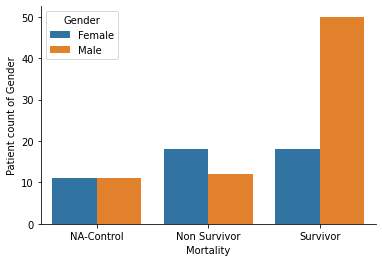

In [9]:
df2 = df1.groupby(['survival', 'Gender']).size().reset_index()
df2= df2.rename(columns={0:'Gender Count'})
print(df2)
axes4=sns.barplot(data=df2,x='survival',y='Gender Count', hue='Gender')
axes4.set(xlabel='Mortality', ylabel='Patient count of Gender')
sns.despine()


        survival  age  Age Count
0     NA-Control   50          1
1     NA-Control   51          1
2     NA-Control   52          4
3     NA-Control   53          2
4     NA-Control   56          1
5     NA-Control   57          4
6     NA-Control   59          1
7     NA-Control   60          2
8     NA-Control   61          2
9     NA-Control   62          1
10    NA-Control   67          2
11    NA-Control   76          1
12  Non Survivor   45          2
13  Non Survivor   46          2
14  Non Survivor   47          4
15  Non Survivor   48          2
16  Non Survivor   53          2
17  Non Survivor   54          2
18  Non Survivor   55          2
19  Non Survivor   59          2
20  Non Survivor   65          2
21  Non Survivor   66          2
22  Non Survivor   67          2
23  Non Survivor   70          2
24  Non Survivor   72          2
25  Non Survivor   78          4
26  Non Survivor   85          2
27      Survivor   25          2
28      Survivor   27          2
29      Su

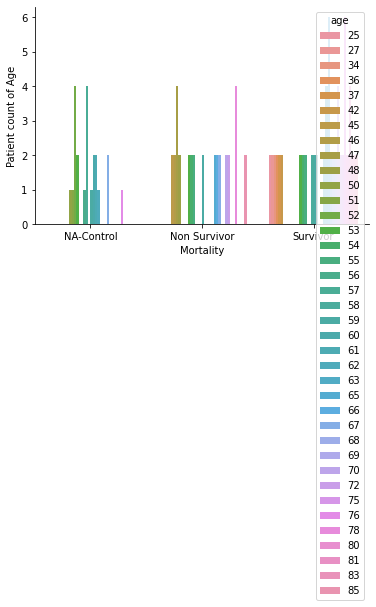

In [20]:
df3 = df1.groupby(['survival', 'age']).size().reset_index()
df3= df3.rename(columns={0:'Age Count'})
print(df3)
axes5=sns.barplot(data=df3,x='survival',y='Age Count', hue='age')
axes5.set(xlabel='Mortality', ylabel='Patient count of Age')
sns.despine()

        survival  age  Age Count
0     NA-Control   50          1
1     NA-Control   51          1
2     NA-Control   52          4
3     NA-Control   53          2
4     NA-Control   56          1
5     NA-Control   57          4
6     NA-Control   59          1
7     NA-Control   60          2
8     NA-Control   61          2
9     NA-Control   62          1
10    NA-Control   67          2
11    NA-Control   76          1
12  Non Survivor   45          2
13  Non Survivor   46          2
14  Non Survivor   47          4
15  Non Survivor   48          2
16  Non Survivor   53          2
17  Non Survivor   54          2
18  Non Survivor   55          2
19  Non Survivor   59          2
20  Non Survivor   65          2
21  Non Survivor   66          2
22  Non Survivor   67          2
23  Non Survivor   70          2
24  Non Survivor   72          2
25  Non Survivor   78          4
26  Non Survivor   85          2
27      Survivor   25          2
28      Survivor   27          2
29      Su

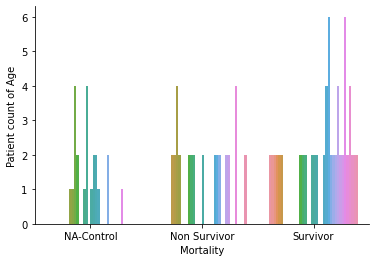

In [17]:
df3 = df1.groupby(['survival', 'age']).size().reset_index()
df3= df3.rename(columns={0:'Age Count'})
print(df3)
axes5=sns.barplot(data=df3,x='survival',y='Age Count', hue='age')
axes5.set(xlabel='Mortality', ylabel='Patient count of Age')
axes5.get_legend().remove()
sns.despine()


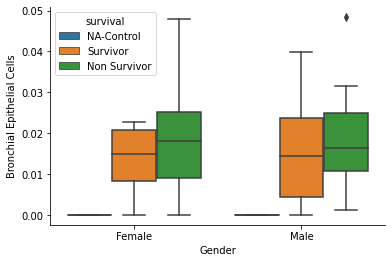

In [9]:
axes1=sns.boxplot(data=df1,x='Gender',y='Bronchial_Epithelial_cells',hue='survival')
axes1.set(xlabel='Gender', ylabel='Bronchial Epithelial Cells')
sns.despine()

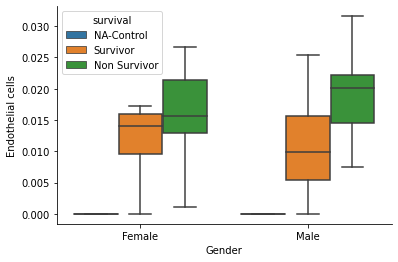

In [13]:
axes1=sns.boxplot(data=df1,x='Gender',y='Endothelial_cells',hue="survival",fliersize=0)
axes1.set(xlabel='Gender', ylabel='Endothelial cells')
sns.despine()

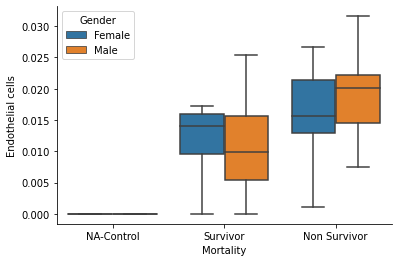

In [ ]:
axes1=sns.boxplot(data=df1,x='survival',y='Endothelial_cells', hue='Gender', fliersize=0)
axes1.set(xlabel='Mortality', ylabel='Endothelial cells')
sns.despine()

1)T cell composition vs mortality by Gender

2)T cell composition vs mortality by Age

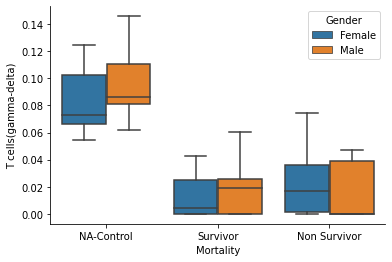

In [ ]:
axes1=sns.boxplot(data=df1,x='survival',y='T_cells_(gamma-delta)', hue='Gender', fliersize=0)
axes1.set(xlabel='Mortality', ylabel='T cells(gamma-delta)')
sns.despine()

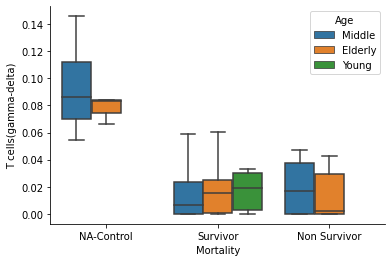

In [ ]:
axes1=sns.boxplot(data=df1,x='survival',y='T_cells_(gamma-delta)', hue='Age', fliersize=0)
axes1.set(xlabel='Mortality', ylabel='T cells(gamma-delta)')
sns.despine()

1)B cell composition vs mortality by Gender

2)B cell composition vs mortality by Age

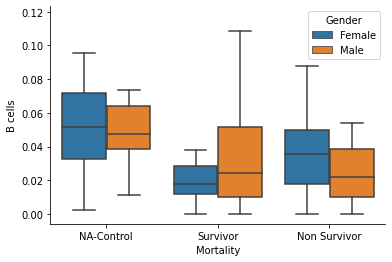

In [14]:
axes1=sns.boxplot(data=df1,x='survival',y='B_cells', hue='Gender', fliersize=0)
axes1.set(xlabel='Mortality', ylabel='B cells')
sns.despine()

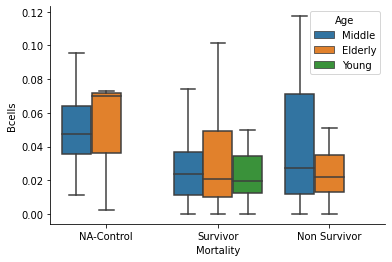

In [15]:
axes1=sns.boxplot(data=df1,x='survival',y='B_cells', hue='Age', fliersize=0)
axes1.set(xlabel='Mortality', ylabel='Bcells')
sns.despine()